In [155]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Example 1, say you have a list of cancer genes with their relative protein expression (Logratios wrt an internal reference)
#Read the data into a dataframe,it can be either excel or csv or a tsv file 
#df = pd.read_excel('Heatmap_sample_data.xls')
#df = pd.read_csv ('Heatmap_sample_data.tsv', sep='\t')
df = pd.read_csv('Heatmap_sample_data.csv')

#visualize the top 10(or n) rows in the data using 'head'
print(df.head(10))

   Genes Samples  Expression
0  AGAP2       A   -0.878237
1   AKT2       A   -1.171150
2   BCL2       A   -0.406262
3  CCND1       A    0.926254
4   CDK4       A    1.317162
5   CHL1       A    0.214561
6   EGFR       A    1.629654
7  EIF4E       A   -0.121098
8  ERBB3       A    0.013921
9  FGFR1       A   -0.845272


In [156]:
#Handy functions in pandas dataframe allow you to look at column names and data types
#print (df.columns)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110 entries, 0 to 109
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Genes       110 non-null    object 
 1   Samples     110 non-null    object 
 2   Expression  110 non-null    float64
dtypes: float64(1), object(2)
memory usage: 2.7+ KB


In [159]:
#The describe function gives you all the stats - good way to find min and max in a column or mean, counts etc.
df.describe()

,Expression
count,110.000000
mean,0.002049
std,0.590709
min,-1.242068
25%,-0.387832
50%,0.020310
75%,0.312178
max,1.737050


In [161]:
# pandas pivot allows you to define the X and Y axis
df1 = pd.pivot_table(df, values='Expression', 
                     index=['Genes'], 
                     columns='Samples')

<AxesSubplot:xlabel='Samples', ylabel='Genes'>

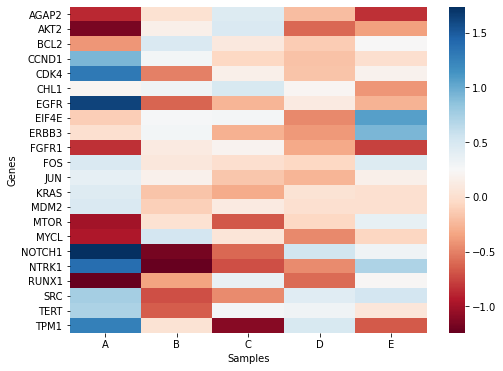

In [162]:
#define the plot size using figsize parameter
plt.figure(figsize=(8, 6))
#Define the color scheme
#sns.heatmap(df1, cmap="YlGnBu")
sns.heatmap(df1, cmap="RdBu")

In [163]:
#Example2 - reading data from a URL
data_url = 'http://bit.ly/2cLzoxH'
df2 = pd.read_csv(data_url)
print(df2.head(3))
  

       country  year         pop continent  lifeExp   gdpPercap
0  Afghanistan  1952   8425333.0      Asia   28.801  779.445314
1  Afghanistan  1957   9240934.0      Asia   30.332  820.853030
2  Afghanistan  1962  10267083.0      Asia   31.997  853.100710


In [164]:
#Define the window, if you are interested only in 3 columns from the above table, make another dataframe and assign the columns
df2_new = df2[['continent', 'year','lifeExp']]
print(df2_new.head())

  continent  year  lifeExp
0      Asia  1952   28.801
1      Asia  1957   30.332
2      Asia  1962   31.997
3      Asia  1967   34.020
4      Asia  1972   36.088


In [165]:
# pandas pivot
heatmap2 = pd.pivot_table(df2_new, values='lifeExp', 
                     index=['continent'], 
                     columns='year')

<AxesSubplot:xlabel='year', ylabel='continent'>

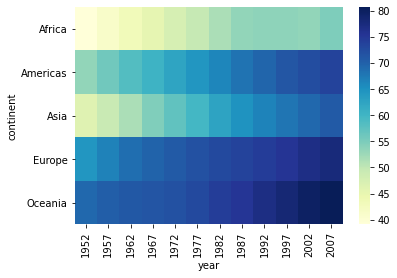

In [166]:
sns.heatmap(heatmap2, cmap="YlGnBu")

In [167]:
df3 = df2[['country','continent', 'year','lifeExp']]
print(df3.head(3))

       country continent  year  lifeExp
0  Afghanistan      Asia  1952   28.801
1  Afghanistan      Asia  1957   30.332
2  Afghanistan      Asia  1962   31.997


<AxesSubplot:xlabel='year', ylabel='continent-country'>

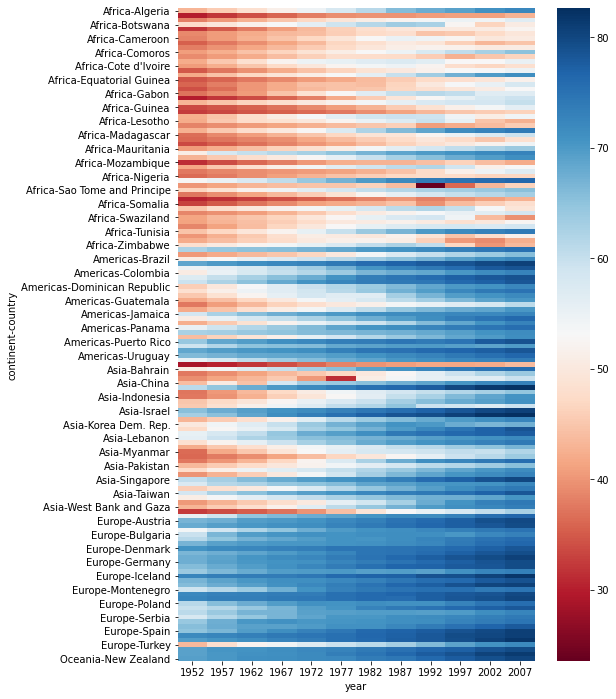

In [168]:
# Adding pandas pivot with multiple variables by specifying both continent and country in the 'index' argument
heatmap3 = pd.pivot_table(df3,values='lifeExp', index=['continent','country'], columns='year')
plt.figure(figsize=(8, 12))
sns.heatmap(heatmap3, cmap="RdBu")

In [169]:
#Example3: 
df = sns.load_dataset('tips')
print (df.head(5))

   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4


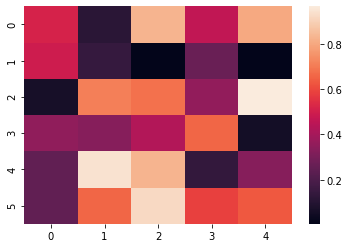

In [170]:
#Example4: Dataframe generated from a random number generator function just to show the different ways to manupulate the heatmap
data_plot = np.random.rand(6,5)
heatmap4 = sns.heatmap(data_plot)
plt.show()

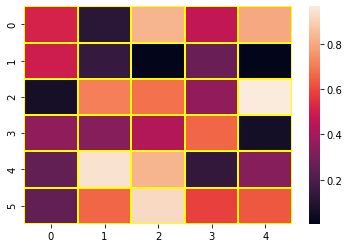

In [171]:
# setting the parameter values
linewidths = 2
linecolor = "yellow"
heatmap5 = sns.heatmap(data_plot,linewidths=linewidths, linecolor=linecolor)

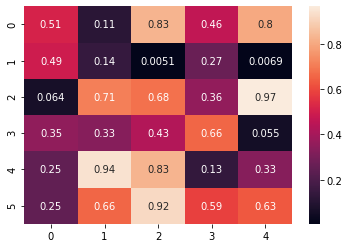

In [172]:
#Adding text values
heatmap6 = sns.heatmap(data_plot,annot=True)
 

Text(33.0, 0.5, 'Range')

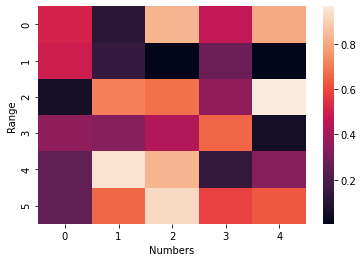

In [173]:
#setting x and y labels
heatmap7 = sns.heatmap(data_plot)
plt.xlabel("Numbers")
plt.ylabel("Range")

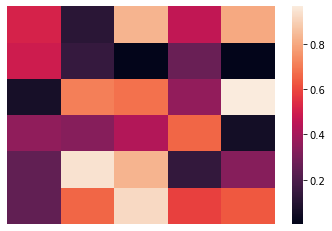

In [174]:
# To diable the x and y labels, reset the parameter values to false
xticklabels = False
yticklabels = False
  
# plotting the heatmap
heatmap8 = sns.heatmap(data=data_plot,
                xticklabels=xticklabels,
                yticklabels=yticklabels)